# 03 Pytorch Computer vision



### Computer vision libraries
* `torchvision` - 
* `torchvision.datasets` - get datasets and data leading function for computer vision
* `torchvision.models` - get pre-trained computer vision models to leverage them
* `torchvision.transforms` - functions or manupilating your vision data ( images ) to suitable for use in the model
* `torch.utils.data.datasets` - base dataset class for pytorch
* `torch.utils.data.dataloader` - Create a python iterable over a dataset

In [2]:
# Import pytorch
import torch
from torch import nn

# Import Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # Converts PIL image to tensor

# Import maplotlib for visulisation
import matplotlib.pyplot as plt

# Check version 
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


### Getting a Dataset
The dataset we are using is FashionMnist.
We have lot of in-built dataset sin torchvision

In [3]:
# Setup train data
train_data = datasets.FashionMNIST(
    root="data", # Where to download the data
    train=True, # do we want a training dataset
    download=True, # do we want to download the dataset
    transform=torchvision.transforms.ToTensor(), # How do we transform the data
    target_transform=None # How do we want to transform the labels?
)

# Testing datasets
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
# Find information about the class names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
# To get the dictionary of class index
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# check the shape of our train_data
image.shape, label
print(f"Image shape: {image.shape} -> [Colour Channel, Height, Width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [Colour Channel, Height, Width]
Image label: Ankle boot


#### Visulizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

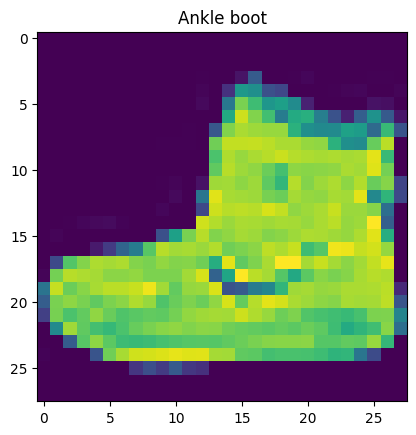

In [18]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

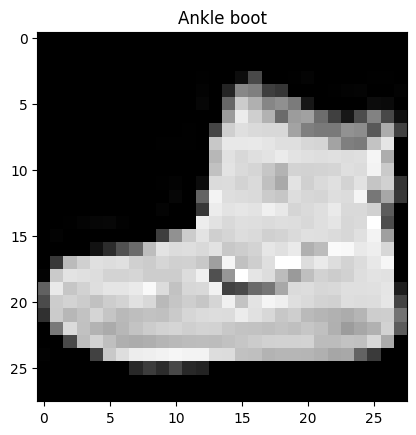

In [19]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

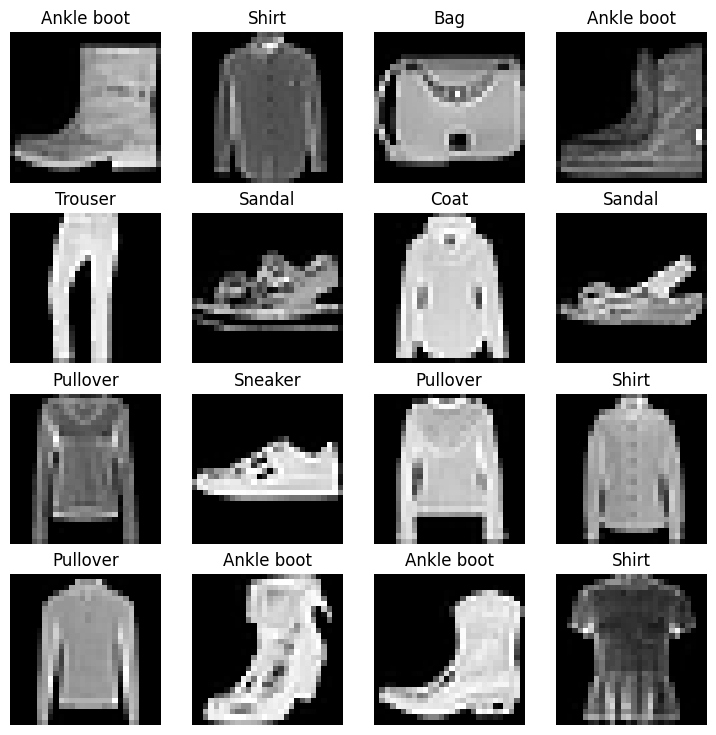

In [22]:
# Plot more images of the train_data
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"{class_names[label]}")
    plt.axis(False)

Do you think this images can modelled using linear or non-linear lines?

#### 2. Prepare Dataloader
- Right now th dataset is in the form of Pytorch Datasets.
- Dataloader Turns our datasets into a python iterable.
- More Specifically, we want to turn our data into batches (or mini-batches).
Why we would do this?
1. if our cpu is able to handle 60k datasets at once then fine or else can be broken down to batches for computionally efficient.
2. It gives our neural network more chanes to update its gradients per epoch.


In [8]:
# we have already imported dataloader
from torch.utils.data import DataLoader
# Setup the hyperparameter 
BATCH_SIZE = 32

# Turn datasets into iterable batches
train_dataloader = DataLoader(
                                dataset=train_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False
                            )

# for test data
test_dataloader = DataLoader(
                                dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False
                            )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x21885d7e0e0>,
 <torch.utils.data.dataloader.DataLoader at 0x218864378e0>)

In [7]:
# Lets check what have we created here
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}....")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}....")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000026CB2850250>, <torch.utils.data.dataloader.DataLoader object at 0x0000026CB2850EB0>)
Length of train dataloader: 1875 batches of 32....
Length of test dataloader: 313 batches of 32....


In [9]:
# check out the whats inside the dataloader
train_feature_batch, train_labels_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: Sneaker,  label size: torch.Size([])


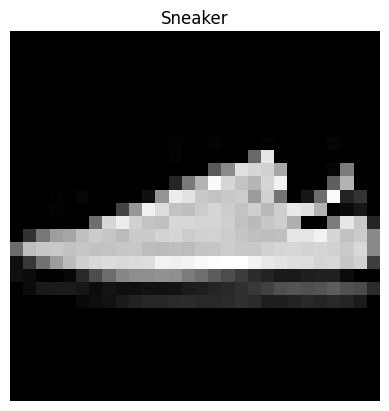

In [9]:
# How do we visuliaze the batches
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_feature_batch), size=[1]).item()
image, label = train_feature_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {image.shape}")
print(f"Label: {class_names[label]},  label size: {label.shape}")

## 3. Building a baseline computer vision model
When starting to build a machne learning models start with Baseline models
Which you will try and improve over time

In [10]:
# Create a flatten model
flatten_model = nn.Flatten()

# Get a single sample 
x = train_feature_batch[0]
x.shape

# Flattent he smaple now
output = flatten_model(x) # peformed a forward pass

# Checks
print(f"Shape before the flatten model : {x.shape} -> [Colour channels, Height, Width]")
print(f"Shape after the flatten mdoel : {output.shape} -> [Colour Channels, Height * Width]")

##### This is required because we are using a linear layer int he model which cant handle multi dimensional vector
##### Hence we wil flatten out the vector to single dimensional vector

Shape before the flatten model : torch.Size([1, 28, 28]) -> [Colour channels, Height, Width]
Shape after the flatten mdoel : torch.Size([1, 784]) -> [Colour Channels, Height * Width]


In [42]:
# Baseline model
from turtle import forward


class FashionMnistModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)
    
# Setup the instance of our model
torch.manual_seed(42)
model_0 = FashionMnistModelV0(input_shape=28*28, # this is 28*28
                              hidden_units=10,
                              output_shape=len(class_names) # One for every class
                              ).to("cpu")
model_0

FashionMnistModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [32]:
# Dummy test
# dummy_x = torch.rand([1,1,28,28])
# model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

#### 3.1 Setup loss function and optimizer
* Loss function - Since we are working with multiclass classification , out loss function will be `nn.CrossEntropyLoss()`
* Optimizer - Out optiizer `torch.optim.SGD()`
* Evaluation metric - Since  we are working on a classification problem, let use accuracy as our evaluation metric

In [33]:
### Getting the helper_functions.py from github accounts
import requests
from pathlib import Path

# Download the file from the github repo
if Path('helper_functions.py').is_file():
    print("The helper file already exists inthe Folder !!!")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

In [43]:
# Now inporting accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
# loss
loss_fn = nn.CrossEntropyLoss()
#optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

#### 3.2 Create a function to time our experiments
Machine learning is very expermiental

Two of the main things you'll often want to track are:
1. Model's Performance (Loss and accuracy values etc )
2. How fast it runs

In [11]:
from timeit import default_timer as timer
def  print_train_time(start: float,
                      end: float,
                      device: torch.device = None):
    """Prints difference between start and end time"""
    total_time = end-start
    print(f"Train time on {device}: {total_time: .3f} seconds")
    return total_time

In [12]:
start_time = timer()
# Some code ...
end_time = timer()

print_train_time(start_time, end_time, device="cpu")

Train time on cpu:  0.000 seconds


1.4600344002246857e-05

### 3.3 Creating a training loop on batches of te data and evaluation
1. loop through epochs
2. loop through training batches, perform trainingn steps, calculate the train loss per batch
3. loop through test batches, perform tetsing steps, calculate the test loss per batch
4. Print out the output
5. Done 

In [44]:
# Import tqdm for progressbar 
from tqdm.auto import tqdm
training_device = "cpu"
# SEt the seed and start and the timer
torch.manual_seed(42)
train_time_start = timer()

# set the number of epochs 
epochs = 3

# Creating a training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    ## Add a loop to loop through trainig batches
    for batch, (X, y) in enumerate(train_dataloader):

        model_0.train()
        
        # 1. Forward Pass
        y_pred = model_0(X)
        
        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate trainign loss for every batches

        # Optimizer to zero grad
        optimizer.zero_grad()

        # BAckward pass 
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Checking
        if batch % 400 == 0:
            print(f"Looked at batch: {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divivde total training loss by the length of train_dataloader
    train_loss /= len(train_dataloader)

    ## Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # forward pass
            test_pred = model_0(X_test)
            # Calculate the loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. calculate the accuracy
            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1),)
            
        # 4. Calculate the test loss average per batch
        test_loss /= len(test_dataloader) # type: ignore

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print Out whats happening
    print(f"\n Train loss: {train_loss: .4f} | Test loss: {test_loss: .4f}, Test Acc: {test_acc}")
    
# Calculate the training time
train_time_end = timer()
total_training_time_taken = print_train_time(train_time_start,
                                                train_time_end,
                                                device=str(next(model_0.parameters()).device)) # type: ignore


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at batch: 0/60000 samples
Looked at batch: 12800/60000 samples
Looked at batch: 25600/60000 samples
Looked at batch: 38400/60000 samples
Looked at batch: 51200/60000 samples


 33%|███▎      | 1/3 [00:08<00:17,  8.89s/it]


 Train loss:  0.5886 | Test loss:  0.5544, Test Acc: 80.27156549520767
Epoch: 1
-------
Looked at batch: 0/60000 samples
Looked at batch: 12800/60000 samples
Looked at batch: 25600/60000 samples
Looked at batch: 38400/60000 samples
Looked at batch: 51200/60000 samples


 67%|██████▋   | 2/3 [00:17<00:08,  8.80s/it]


 Train loss:  0.4743 | Test loss:  0.5186, Test Acc: 81.9888178913738
Epoch: 2
-------
Looked at batch: 0/60000 samples
Looked at batch: 12800/60000 samples
Looked at batch: 25600/60000 samples
Looked at batch: 38400/60000 samples
Looked at batch: 51200/60000 samples


100%|██████████| 3/3 [00:26<00:00,  8.68s/it]


 Train loss:  0.4530 | Test loss:  0.5032, Test Acc: 82.47803514376997
Train time on cpu:  26.042 seconds


#### 4. Evaluate our model

In [15]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               total_train_time: float):
    """Returns a dictionary containing th eresults of model predicting on data loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # make predictions
            y_pred = model(X)

            # Accumulate the loss and Acc
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))

        # Scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name':model.__class__.__name__, # works when model is created using class
            'model_loss':loss.item(),
            'model_acc':acc,
            'Training_time':total_training_time_taken}





In [46]:
# Calculate the model 0 results
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             total_train_time=total_training_time_taken)
model_0_results

100%|██████████| 313/313 [00:00<00:00, 313.59it/s]


{'model_name': 'FashionMnistModelV0',
 'model_loss': 0.5031646490097046,
 'model_acc': 82.47803514376997,
 'Training_time': 26.041918700095266}

#### 5. Setup device agnostic code

In [47]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

#### 6. Modeling model with non-linearity

In [48]:
# Create a model with linear and non-linear layer
class FashionMnistModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 output_shape: int,
                 hidden_units: int,
                 ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [49]:
# Instantiate our model now
torch.manual_seed(42)
model_1 = FashionMnistModelV1(input_shape=784, # This is the output from the flatten modeule
                              output_shape=len(class_names),
                              hidden_units=10).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [50]:
## Creating a loss function and optimizer
# loss
loss_fn = nn.CrossEntropyLoss() # Measure how wrong our model is
#optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1) # Tries to update our parameters to reduce the loss


#### 6.2 Functionizing Training and evaluation loop
Lets create a function for:
* Training Loop - `train_step()`
* Testing Loop - `test_step()`

In [ ]:
# Functioning the training and evaluation loop


In [36]:
def train_step(model: torch.nn.Module,
                  data_loader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  optimizer: torch.optim.Optimizer,
                  accuracy_fn,
                  device: torch.device = device):
    """Performs a training with model trying to learn on data_loader"""
    ### Training
    train_loss, train_acc = 0, 0
    # Put model into trainign mode or target device
    model.train()
    ## Add a loop to loop through trainig batches
    for batch, (X, y) in enumerate(data_loader):

        # Put data to target device
        X, y = X.to(device), y.to(device)
               
        # 1. Forward Pass
        y_pred = model(X)
        
        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate trainign loss for every batches
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # go logits -> prediction labels

        # Optimizer to zero grad
        optimizer.zero_grad()

        # BAckward pass 
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Checking
        if batch % 400 == 0:
            print(f"Looked at batch: {batch * len(X)}/{len(data_loader.dataset)} samples")

    # Divivde total training loss by the length of train_dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Training Loss: {train_loss: .5f} | Train Acc: {train_acc: .2f} %")

In [37]:
# Testing loop function
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader"""
    test_loss, test_acc = 0,0

    # Put the model in eval mode
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send the data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward Pass
            test_pred = model(X)

            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))
            
        # Adjust the metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss: .5f} | Test acc: {test_acc: .2f}%")


In [51]:
# Combine the two functions
# Measure Time
from timeit import default_timer as Timer

train_time_start = timer()

#Set the Epochs
epochs = 3

# Create a optimization adn evaluation loop using the functions created
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_step(model=model_1,
                  data_loader=train_dataloader,
                  loss_fn=loss_fn,
                  optimizer=optimizer,
                  accuracy_fn=accuracy_fn,
                  device=device)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end = timer()
total_training_time_model_1 = print_train_time(start=train_time_start,
                                               end=train_time_end,
                                               device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at batch: 0/60000 samples
Looked at batch: 12800/60000 samples
Looked at batch: 25600/60000 samples
Looked at batch: 38400/60000 samples
Looked at batch: 51200/60000 samples
Training Loss:  1.04251 | Train Acc:  62.67 %


 33%|███▎      | 1/3 [00:06<00:12,  6.05s/it]

Test Loss:  0.97815 | Test acc:  63.94%
Epoch: 1
--------
Looked at batch: 0/60000 samples
Looked at batch: 12800/60000 samples
Looked at batch: 25600/60000 samples
Looked at batch: 38400/60000 samples
Looked at batch: 51200/60000 samples
Training Loss:  0.90096 | Train Acc:  66.78 %


 67%|██████▋   | 2/3 [00:11<00:05,  5.96s/it]

Test Loss:  0.94511 | Test acc:  65.02%
Epoch: 2
--------
Looked at batch: 0/60000 samples
Looked at batch: 12800/60000 samples
Looked at batch: 25600/60000 samples
Looked at batch: 38400/60000 samples
Looked at batch: 51200/60000 samples
Training Loss:  0.87287 | Train Acc:  67.47 %


100%|██████████| 3/3 [00:17<00:00,  5.99s/it]

Test Loss:  0.91733 | Test acc:  66.16%
Train time on cuda:  17.968 seconds


**Note**: Sometimes , depending on your data/hardware you might find that your models trains on CPU faster tan GPU
Wht is that?
* It could be that the overhead for copying data/model to and from GPU overweight the compute benefits offered by the GPU.
*  The hardware your using has better CPU in terms of compute than GPU.

In [19]:
# Updated Eval function
torch.manual_seed(42)
def eval_model_1(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               total_train_time: float,
               device=device):
    """Returns a dictionary containing th eresults of model predicting on data loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Map to target device
            X, y = X.to(device), y.to(device)
            # make predictions
            y_pred = model(X)

            # Accumulate the loss and Acc
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))

        # Scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name':model.__class__.__name__, # works when model is created using class
            'model_loss':loss.item(),
            'model_acc':acc,
            'Training_time':total_train_time}

In [52]:
# Get model 1 result dictionary
model_1_result = eval_model_1(
                                model=model_1,
                                data_loader=test_dataloader,
                                loss_fn=loss_fn,
                                accuracy_fn=accuracy_fn,
                                total_train_time=total_training_time_model_1,
                                device=device
                            )

model_1_result

100%|██████████| 313/313 [00:00<00:00, 388.87it/s]


{'model_name': 'FashionMnistModelV1',
 'model_loss': 0.9173313975334167,
 'model_acc': 66.16413738019169,
 'Training_time': 17.96819629985839}

## Building a CNN model in Pytorch
* CNN's are also knows ConvNets.
* CNN's are known for their capability to find pattern in an image.
* **Understanding CNN Deeper**: https://poloclub.github.io/cnn-explainer/

In [24]:
# Create a convulution Neural Network
class FashionMnistModelV2(nn.Module):
    """
    Model Architexture representing Tiny VGG model
    Model from CNN explainer website
    """
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ), # Values we set are called NN hyperparameters
            # Add relu layer
            nn.ReLU(),
            # conv
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # There is a trick in calculating this
                      out_features=output_shape)
        )

    def forward(self, x:torch.Tensor):
        x = self.conv_block_1(x)
        #print(f"Output Shape of conv block 1: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Output Shape of conv block 2: {x.shape}")
        x = self.classifier(x)
        #print(f"Output Shape of classifier: {x.shape}")
        return x

In [34]:
# Instantiate our model
torch.manual_seed(42)
model_2 = FashionMnistModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

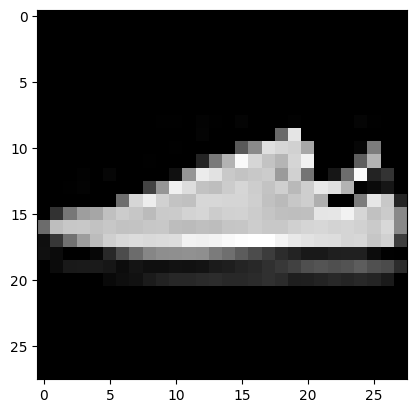

In [46]:
plt.imshow(image.squeeze(), cmap="gray")

In [67]:
rand_img_tensor = torch.randn(size=(1,28,28))
rand_img_tensor.shape

torch.Size([1, 28, 28])

In [71]:
model_2(rand_img_tensor.unsqueeze(0))

Output Shape of conv block 1: torch.Size([1, 10, 14, 14])
Output Shape of conv block 2: torch.Size([1, 10, 7, 7])
Output Shape of classifier: torch.Size([1, 10])


tensor([[-0.2702,  0.0189, -0.0636, -0.0638,  0.0430, -0.1024,  0.1186, -0.0101,
         -0.0168,  0.1683]], grad_fn=<AddmmBackward0>)

### 7.1 Using the model 

In [38]:
torch.manual_seed(42)
# Create a batch of Images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single Image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single Image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [39]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [40]:
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data through Conv2d
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.6446e-01, -6.2518e-01, -7.7713e-01,  ..., -3.2504e-01,
          -3.1604e-01,  4.5352e-01],
         [ 3.5455e-01, -2.8778e-01, -6.0596e-02,  ...,  6.6224e-01,
          -2.3216e-01,  7.7080e-01],
         [-4.5420e-02, -9.8911e-01, -4.0099e-01,  ..., -1.8552e-01,
          -5.7622e-01,  4.2301e-01],
         ...,
         [ 2.9288e-01, -1.4512e-01, -1.1566e-01,  ..., -3.6626e-01,
           3.5645e-01,  2.8384e-01],
         [ 2.0746e-01,  3.6096e-02,  1.5214e-01,  ..., -4.9680e-01,
          -7.2258e-01, -8.3858e-02],
         [-3.2457e-01, -3.2326e-01,  9.5475e-02,  ...,  5.9960e-01,
           3.2819e-01,  3.6604e-01]],

        [[ 1.2406e+00,  2.2794e-01, -1.8362e-01,  ..., -6.3520e-01,
          -7.5413e-01,  4.0612e-01],
         [ 4.1380e-01, -1.0853e+00, -1.6079e+00,  ..., -1.7643e+00,
           2.5263e-01,  3.8844e-01],
         [ 5.3442e-01, -8.2507e-01,  6.3866e-01,  ...,  4.8068e-01,
           8.4869e-01, -1.5706e-01],
         ...,
         [-5.6922e-03, -5

In [41]:
conv_output.shape

torch.Size([10, 64, 64])

In [43]:
## Stepping through MAXPOOL2d
print(f"Test image original shape: {test_image.shape}")

# create a single layer model
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the data throught just the conv_layer
test_image_thru_conv = conv_layer(test_image)
print(f"Shape after goign throught the conv layer: {test_image_thru_conv.shape}")
# pass the data throught he layer
test_image_through_maxpool = max_pool_layer(test_image_thru_conv)
print(f"shape after going through conv and maxpool layer: {test_image_through_maxpool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Shape after goign throught the conv layer: torch.Size([10, 64, 64])
shape after going through conv and maxpool layer: torch.Size([10, 32, 32])


In [45]:
# Create a random tensor with a similar number of dimensions
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor: {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tensor throught the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: {max_pool_tensor}")
print(f"\nMax_pool tensor shape: {max_pool_tensor.shape}")

Random tensor: tensor([[[[ 1.6038, -1.5536],
          [-0.1468, -0.4270]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: tensor([[[[1.6038]]]])

Max_pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 SEtup loss and trainign the `model_2`

In [35]:
### 7.3 SEtup loss and trainign the model_2
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [31]:
# Measure time
from timeit import default_timer as Timer
from tqdm.auto import tqdm

In [39]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start = timer()

# Train the test model
epochs = 3

# loop through each epoch
for epoch in tqdm(range(epochs)):
    print("Epoch: {epoch}\n---------------------")
    train_step(model=model_2,
                  data_loader=train_dataloader,
                  loss_fn=loss_fn,
                  optimizer=optimizer,
                  accuracy_fn=accuracy_fn,
                  device=device)
    
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end = timer()
total_training_time_model_2 = print_train_time(
                                                start=train_time_start,
                                                end=train_time_end,
                                                device=device
                                                )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: {epoch}
---------------------
Looked at batch: 0/60000 samples
Looked at batch: 12800/60000 samples
Looked at batch: 25600/60000 samples
Looked at batch: 38400/60000 samples
Looked at batch: 51200/60000 samples
Training Loss:  0.30778 | Train Acc:  88.78 %


 33%|███▎      | 1/3 [00:07<00:14,  7.38s/it]

Test Loss:  0.33494 | Test acc:  88.11%
Train time on cuda:  7.381 seconds
Epoch: {epoch}
---------------------
Looked at batch: 0/60000 samples
Looked at batch: 12800/60000 samples
Looked at batch: 25600/60000 samples
Looked at batch: 38400/60000 samples
Looked at batch: 51200/60000 samples
Training Loss:  0.29454 | Train Acc:  89.33 %


 67%|██████▋   | 2/3 [00:14<00:07,  7.23s/it]

Test Loss:  0.32439 | Test acc:  88.67%
Train time on cuda:  14.508 seconds
Epoch: {epoch}
---------------------
Looked at batch: 0/60000 samples
Looked at batch: 12800/60000 samples
Looked at batch: 25600/60000 samples
Looked at batch: 38400/60000 samples
Looked at batch: 51200/60000 samples
Training Loss:  0.28509 | Train Acc:  89.63 %


100%|██████████| 3/3 [00:21<00:00,  7.25s/it]

Test Loss:  0.32025 | Test acc:  88.82%
Train time on cuda:  21.752 seconds


In [40]:
# Now lets get the model REsults
model_2_result = eval_model_1(
                              model=model_2,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                              total_train_time=total_training_time_model_2,
                              device=device      
                                )
                                

100%|██████████| 313/313 [00:00<00:00, 331.96it/s]


In [41]:
model_2_result

{'model_name': 'FashionMnistModelV2',
 'model_loss': 0.32025325298309326,
 'model_acc': 88.81789137380191,
 'Training_time': 21.75230920035392}

## 8. Comparing the results of our models and training time

In [ ]:
import pandas as pd
